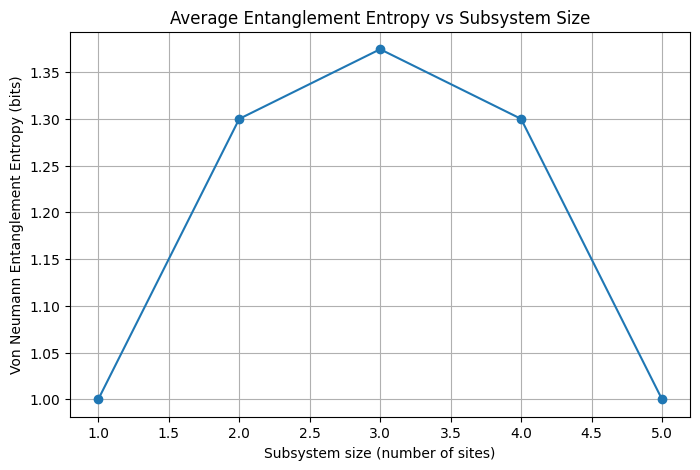

In [1]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt

# Number of sites (e.g., benzene has 6)
n_sites = 6

# Create the tight-binding Hamiltonian for a ring (stoquastic: -t hopping between neighbors)
t = 1.0
H = np.zeros((n_sites, n_sites))

for i in range(n_sites):
    j = (i + 1) % n_sites  # periodic boundary (ring)
    H[i, j] = H[j, i] = -t  # stoquastic: negative hopping

# Diagonalize the Hamiltonian
eigvals, eigvecs = eigh(H)

# For half-filling, fill the lowest n_sites // 2 orbitals
n_electrons = n_sites // 2
occupied_orbitals = eigvecs[:, :n_electrons]

# Correlation matrix for the ground state (free fermion)
C = occupied_orbitals @ occupied_orbitals.T.conj()  # correlation matrix

# Function to compute von Neumann entropy from correlation eigenvalues
def von_neumann_entropy(eigvals):
    entropy = 0.0
    for lam in eigvals:
        if 1e-12 < lam < 1 - 1e-12:
            entropy -= lam * np.log2(lam) + (1 - lam) * np.log2(1 - lam)
    return entropy

# Calculate entropy for all contiguous subsystems
entropies = []
subsystem_sizes = range(1, n_sites)  # from size 1 to size n_sites -1

for size in subsystem_sizes:
    size_entropies = []
    # Because ring is periodic, consider all contiguous subsystems of this size
    for start in range(n_sites):
        # Subsystem indices wrapping around ring
        subsystem = [(start + i) % n_sites for i in range(size)]
        C_sub = C[np.ix_(subsystem, subsystem)]
        eigvals_sub = eigh(C_sub)[0]
        S = von_neumann_entropy(eigvals_sub)
        size_entropies.append(S)
    # Average entropy over all subsystems of this size
    entropies.append(np.mean(size_entropies))

# Plot the entanglement entropy vs subsystem size
plt.figure(figsize=(8,5))
plt.plot(subsystem_sizes, entropies, marker='o')
plt.title("Average Entanglement Entropy vs Subsystem Size")
plt.xlabel("Subsystem size (number of sites)")
plt.ylabel("Von Neumann Entanglement Entropy (bits)")
plt.grid(True)
plt.show()


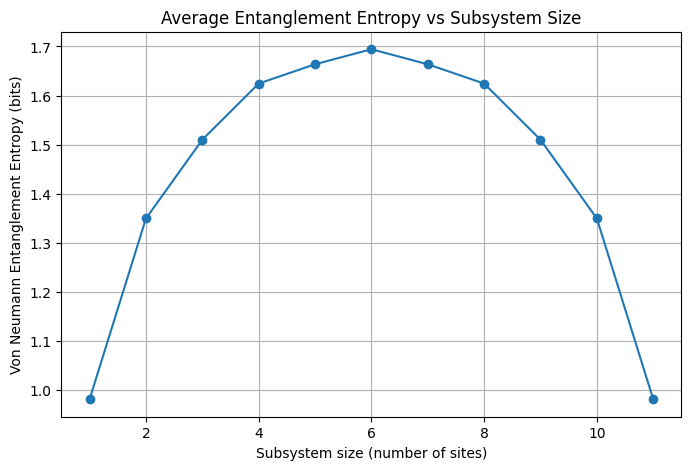

In [2]:
# Number of sites (e.g., benzene has 6)
n_sites = 12

# Create the tight-binding Hamiltonian for a ring (stoquastic: -t hopping between neighbors)
t = 1.0
H = np.zeros((n_sites, n_sites))

for i in range(n_sites):
    j = (i + 1) % n_sites  # periodic boundary (ring)
    H[i, j] = H[j, i] = -t  # stoquastic: negative hopping

# Diagonalize the Hamiltonian
eigvals, eigvecs = eigh(H)

# For half-filling, fill the lowest n_sites // 2 orbitals
n_electrons = n_sites // 2
occupied_orbitals = eigvecs[:, :n_electrons]

# Correlation matrix for the ground state (free fermion)
C = occupied_orbitals @ occupied_orbitals.T.conj()  # correlation matrix

# Function to compute von Neumann entropy from correlation eigenvalues
def von_neumann_entropy(eigvals):
    entropy = 0.0
    for lam in eigvals:
        if 1e-12 < lam < 1 - 1e-12:
            entropy -= lam * np.log2(lam) + (1 - lam) * np.log2(1 - lam)
    return entropy

# Calculate entropy for all contiguous subsystems
entropies = []
subsystem_sizes = range(1, n_sites)  # from size 1 to size n_sites -1

for size in subsystem_sizes:
    size_entropies = []
    # Because ring is periodic, consider all contiguous subsystems of this size
    for start in range(n_sites):
        # Subsystem indices wrapping around ring
        subsystem = [(start + i) % n_sites for i in range(size)]
        C_sub = C[np.ix_(subsystem, subsystem)]
        eigvals_sub = eigh(C_sub)[0]
        S = von_neumann_entropy(eigvals_sub)
        size_entropies.append(S)
    # Average entropy over all subsystems of this size
    entropies.append(np.mean(size_entropies))

# Plot the entanglement entropy vs subsystem size
plt.figure(figsize=(8,5))
plt.plot(subsystem_sizes, entropies, marker='o')
plt.title("Average Entanglement Entropy vs Subsystem Size")
plt.xlabel("Subsystem size (number of sites)")
plt.ylabel("Von Neumann Entanglement Entropy (bits)")
plt.grid(True)
plt.show()
